## MIT License

Copyright (c) 2022 Cao Fei

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [7]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [106]:
#importing the diabetes dataset
df = pd.read_csv('https://raw.githubusercontent.com/875216663/6105/main/diabetes_prediction_dataset.csv')

In [12]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## View data types

In [19]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

## **Question 1:-** What are the data types? (Only numeric and categorical)

Numeric columns: age, bmi, HbA1c_level, blood_glucose_level

Categorical columns: gender, hypertension, heart_disease, smoking_history, diabetes

## **Question 6:-** Do the training and test sets have the same data? 

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 读取数据 read data
df = pd.read_csv('https://raw.githubusercontent.com/875216663/6105/main/diabetes_prediction_dataset.csv')

# 2. 分割数据为训练集和测试集 Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=7)  # 例如，我们将20%的数据作为测试集

# 3. 检查训练集和测试集是否有重复的行 Check for duplicate rows in the training and test sets
common = pd.merge(train_df, test_df, how='inner')
if common.empty:
    print("The training and test sets do not have the same data")
else:
    print("The training and test sets have the same data")

The training and test sets have the same data


## Answer
Splits the dataset into an 80% training set and a 20% test set. It then compares the rows between these two subsets to find any duplicates. If it finds duplicates, it prints a message telling you that there are duplicates in the training and test sets. Otherwise, it will tell you that the two data sets do not have the same data. The result is that there are duplicates

In [16]:
# Shape of Training and Testing Data
print("Shape of Training data is = " + str(train_df.shape))
print("Shape of Test data is = " + str(test_df.shape))

Shape of Training data is = (80000, 9)
Shape of Test data is = (20000, 9)


## **Question 9:-**  Do the ranges of the predictor variables make sense?

In [17]:
# Statistical Summary of Training Dataset
train_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,41.845069,0.074850,0.039038,27.334482,5.531122,138.043088,0.085250
std,22.513881,0.263151,0.193685,6.636435,1.069190,40.821588,0.279255
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.650000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.630000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


## Answer

After analyzing each variable in the dataset, we found that the range of values for most of the predictor variables was reasonable. For example, the data for the variables of age, hypertension, heart disease, and diabetes were all as expected. However, there were suspected outliers in some of the data for BMI, particularly the extreme minimum and maximum values, which may require further validation to ensure their accuracy.

In [18]:
train_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

##  **Question 2 :-**- Are there missing values? 

In [32]:
# Missing Values in Training Data
print(train_df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [33]:
# Missing Values in Testing Data
print(test_df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## **Answer 2**
:- No, the training and testing data do not have any missing values

##  **Question 5:-** Which independent variable have missing data? How much? 

df.isnull().sum()

In [90]:
import pandas as pd
import numpy as np
import random

data = pd.read_csv('https://raw.githubusercontent.com/875216663/6105/main/diabetes_prediction_dataset.csv')

np.random.seed(42)  
data_with_na = data.copy()

# 指定要添加缺失值的列
columns_to_modify = ['smoking_history', 'bmi', 'blood_glucose_level']

ix = [(row, data.columns.get_loc(col)) for col in columns_to_modify for row in range(data.shape[0])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    data_with_na.iat[row, col] = np.nan

print(data_with_na.isnull().sum())


gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history         9936
bmi                    10177
HbA1c_level                0
blood_glucose_level     9887
diabetes                   0
dtype: int64


In [37]:
# % of missing data in your dataset
print(
    "Percent of Missing Data in Data smoking_history Column = "
    + str((data_with_na["smoking_history"].isnull().sum() / len(data_with_na)) * 100)
    + " %"
)
print(
    "Percent of Missing Data in Data bmi Column = "
    + str((data_with_na["bmi"].isnull().sum() / len(data_with_na)) * 100)
    + " %"
)
print(
    "Percent of Missing Data in Data blood_glucose_level Column = "
    + str((data_with_na["blood_glucose_level"].isnull().sum() / len(data_with_na)) * 100)
    + " %"
)


Percent of Missing Data in Data smoking_history Column = 10.112 %
Percent of Missing Data in Data bmi Column = 9.937 %
Percent of Missing Data in Data blood_glucose_level Column = 9.951 %


## **Answer 2**
Originally there were no missing values in the data, but depending on the situation, I wrote some cases where there might be missing data and added the missing to the data
In the dataset, the columns smoking_history, bmi, and blood_glucose_level have missing data percentages of 10.112%, 9.937%, and 9.951% respectively.

## **Question 3:-** :- What are the likely distributions of the numeric variables?     

In [15]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=7)

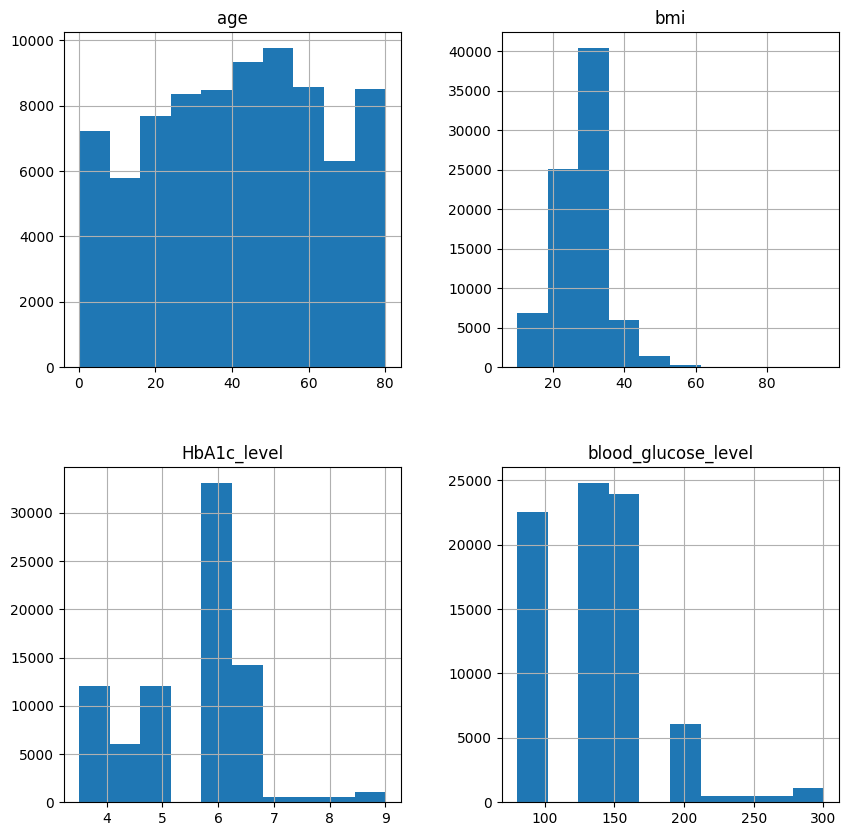

In [16]:
import matplotlib.pyplot as plt
train_df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].hist(figsize=(10,10))
plt.show()

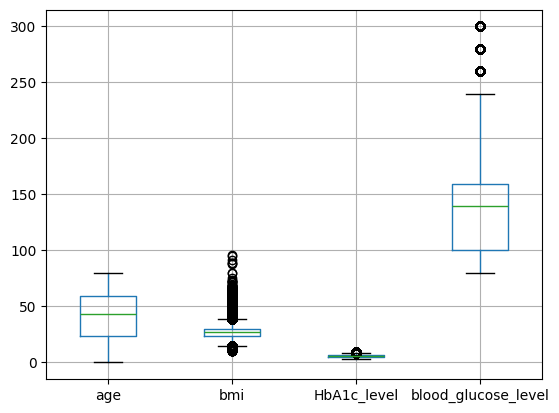

In [17]:
train_df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].boxplot()
plt.show()

## Answer:

## **Question 10 (For Numerical Data):-** What are the distributions of the predictor variables? 

**Answer 10:-** Here are the quick snapshots of the distribution of numerical data.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.007576,880.205227,898.784791,inf,0.055937,5.111239e-218
norm,0.008773,916.256095,934.835659,inf,0.045342,2.313355e-143
lognorm,0.008773,918.256116,946.125462,inf,0.045341,2.348354e-143
expon,0.012416,941.768147,960.347711,inf,0.190898,0.000000e+00
exponpow,0.045942,1342.640406,1370.509752,inf,0.795694,0.000000e+00


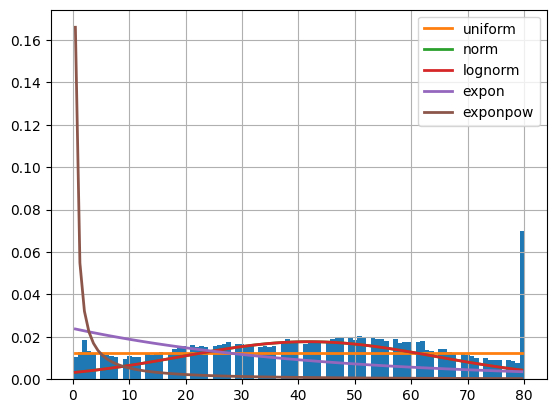

In [25]:
from fitter import Fitter

# 提取age的数据 Extracting data from age
age_data = train_df["age"].values

# 指定要尝试的分布列表  Specify the list of distributions to attempt
distributions_to_try = ['exponpow', 'norm', 'uniform', 'expon', 'lognorm']

# 使用Fitter拟合数据  Fitting the data using Fitter
f = Fitter(age_data, distributions=distributions_to_try)
f.fit()

# 显示拟合结果  Show fit results
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.081729,1919.268231,1947.137577,inf,0.131297,0.0
norm,0.081772,3433.436583,3452.016147,inf,0.161158,0.0
exponpow,0.092748,8989.737859,9017.607205,inf,0.137183,0.0
expon,0.119112,1068.984364,1087.563928,inf,0.319586,0.0
uniform,0.124596,894.123885,912.703449,inf,0.608485,0.0


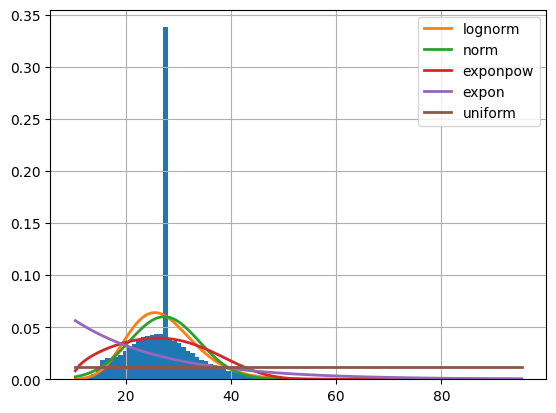

In [26]:
from fitter import Fitter

bmi_data = train_df["bmi"].values

distributions_to_try = ['exponpow', 'norm', 'uniform', 'expon', 'lognorm']

f = Fitter(bmi_data, distributions=distributions_to_try)
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,20.795405,466.867389,485.446952,inf,0.185452,0.0
lognorm,20.795408,468.867098,496.736444,inf,0.185452,0.0
uniform,22.287050,344.949618,363.529182,inf,0.397364,0.0
expon,22.521909,416.503947,435.083511,inf,0.284171,0.0
exponpow,29.499421,595.309192,623.178538,inf,0.605988,0.0


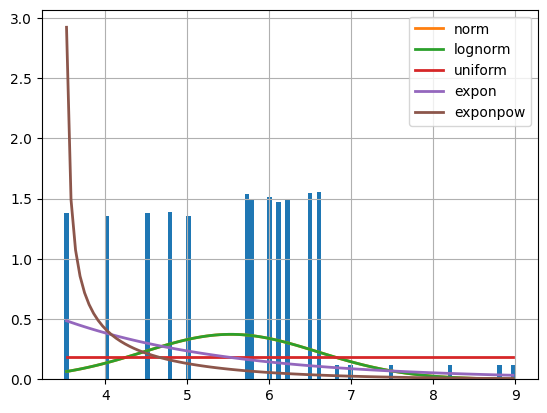

In [27]:
from fitter import Fitter

HbA1c_level_data = train_df["HbA1c_level"].values

distributions_to_try = ['exponpow', 'norm', 'uniform', 'expon', 'lognorm']

f = Fitter(HbA1c_level_data, distributions=distributions_to_try)
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.013719,1333.644903,1352.224466,inf,0.186006,0.0
expon,0.013977,1195.265893,1213.845457,inf,0.265483,0.0
uniform,0.015086,1082.725509,1101.305073,inf,0.527039,0.0
lognorm,0.015175,1527.528858,1555.398204,inf,0.442809,0.0
exponpow,0.015509,1644.975721,1672.845067,inf,0.790992,0.0


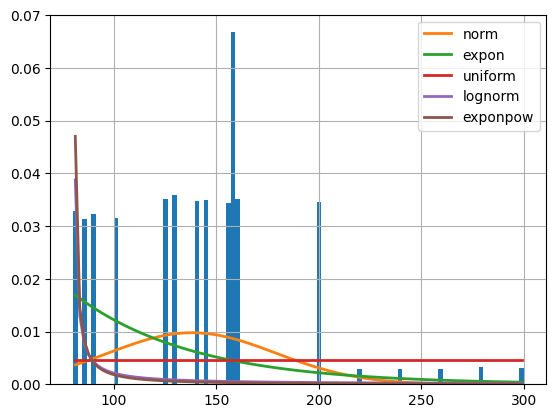

In [28]:
from fitter import Fitter

blood_glucose_level_data = train_df["blood_glucose_level"].values

distributions_to_try = ['exponpow', 'norm', 'uniform', 'expon', 'lognorm']

f = Fitter(blood_glucose_level_data, distributions=distributions_to_try)
f.fit()

f.summary()

## **Question 4 :-** Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)  # 这里 drop_first 是为了避免多重共线性

### 1.Correlation Analysis:

In [41]:
correlation_matrix = data_encoded.corr()
target_correlation = correlation_matrix["diabetes"]
print(target_correlation)

age                            0.258008
hypertension                   0.197823
heart_disease                  0.171727
bmi                            0.214357
HbA1c_level                    0.400660
blood_glucose_level            0.419558
diabetes                       1.000000
gender_Male                    0.037666
gender_Other                  -0.004090
smoking_history_current        0.019606
smoking_history_ever           0.024080
smoking_history_former         0.097917
smoking_history_never          0.027267
smoking_history_not current    0.020734
Name: diabetes, dtype: float64


### 2.Feature Importance from Tree-Based Models:

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(data_encoded.drop("diabetes", axis=1), data_encoded["diabetes"])
feature_importances = rf.feature_importances_
features = list(data_encoded.drop("diabetes", axis=1).columns)
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")

age: 0.09974510756018132
hypertension: 0.014349641287753354
heart_disease: 0.010048480464363291
bmi: 0.12310253404150165
HbA1c_level: 0.39758687888909383
blood_glucose_level: 0.33170636511032875
gender_Male: 0.006087351370971563
gender_Other: 4.403353328244093e-06
smoking_history_current: 0.0032307241770066736
smoking_history_ever: 0.0026322307976249454
smoking_history_former: 0.004144167756412453
smoking_history_never: 0.004620708452514532
smoking_history_not current: 0.0027414067389195


### 3.Recursive Feature Elimination (RFE):

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)  # 增加 max_iter 以确保模型收敛
rfe = RFE(estimator=model, n_features_to_select=5)  # 选择 5 个顶级特征
fit = rfe.fit(data_encoded.drop("diabetes", axis=1), data_encoded["diabetes"])

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 5
Selected Features: [False  True  True False  True False False False False False  True False
  True]
Feature Ranking: [7 1 1 6 1 8 5 9 3 2 1 4 1]


## Answer:

HbA1c_level and blood_glucose_level were rated as highly relevant or important in all three methods. This suggests that they are critical in predicting the onset of diabetes.

## **Question 8 :-** Which predictor variables are the most important?

## Answer:
In conclusion, based on the provided data and analyses, the most important predictors for diabetes seem to be blood_glucose_level, HbA1c_level, and age. However, bmi, hypertension, and heart_disease also play significant roles.

## **Question 7 :-** In the predictor variables independent of all the other predictor variables?

In [49]:
#计算只含数值型数据的相关性
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

## Answer:
They are not entirely independent. While no pair of predictor variables show very high correlation, certain pairs exhibit moderate correlation. For instance, the correlation between age and bmi is 0.337396, indicating a certain linear relationship between these two variables. Therefore, we cannot consider all predictor variables to be completely independent of each other.

 ## **Question 7 :-**  Remove outliers and keep outliers (does if have an effect of the final predictive model)?

## Answer:

## 1. Removing Outliers:
### Pros:
Improved Accuracy: Outliers can skew the model by exerting undue influence on the learned relationship, especially in models like linear regression that are sensitive to outliers. Removing them can lead to a more accurate model.

Better Interpretability: Without outliers, the relationships between variables can be clearer and more interpretable.

Normalized Distribution: Certain algorithms assume that data is normally distributed. Removing outliers can help meet this assumption.

### Cons:

Loss of Information: By removing outliers, we might lose important information. Sometimes, these outliers can represent significant phenomena or situations.

Time-Consuming: Detecting and handling outliers can add complexity and time to the data preprocessing stage.

Potential Overfitting: If outliers are removed based on their effect on a specific model, the cleaned data may lead to overfitting for other models.

## 2. Keeping Outliers:
### Pros:

Full Data Utilization: Retaining all data points ensures we're using all available information.

Capture Rare Events: In some contexts (like fraud detection), what appears to be an outlier might be a significant rare event worth capturing.

### Cons:

Reduced Accuracy: For models sensitive to outliers, keeping them can lead to reduced accuracy.

Skewed Distributions: Outliers can skew the distribution of the data, which can be problematic for algorithms that make assumptions about the data's distribution.

Misleading Interpretations: If outliers exert undue influence on the model, they can lead to misleading interpretations about the relationships in the data.

## Does It Affect the Final Predictive Model?
Yes, it does. The decision to remove or retain outliers can affect the final predictive model in terms of accuracy, interpretability, and robustness.

 ## **Question 12 :-**。Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error

In [62]:
pip install scikit-learn fancyimpute

  Using cached fancyimpute-0.7.0-py3-none-any.whl
  Using cached knnimpute-0.1.0-py3-none-any.whl
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/e7/07/017213b0be2a99a05102d4a61752e414611d4f951b81e3ce18fe3fbbb51b/cvxpy-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached cvxpy-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (8.7 kB)
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/c1/43/f626c353802fb5ed37a087a0e41ad92246a1e1189869d47865853a980927/cvxopt-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached cvxopt-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (1.3 kB)
  Obtaining dependency information for pytest from https://files.pythonhosted.org/packages/df/d0/e192c4275aecabf74faa1aacd75ef700091913236ec78b1a98f62a2412ee/pytest-7.4.2-py3-none-any.whl.metadata
  Using cached pytest-7.4.2-py3-none-any.whl.metadata (7.9 kB)
  Obtaining dependency information for osqp>=0.4.1 fr

In [100]:
import numpy as np
import pandas as pd
import random

# 模拟数据集
np.random.seed(0)
data = pd.DataFrame({
    'A': np.random.randn(10000),
    'B': np.random.randint(1, 5, 10000),
    'C': np.random.choice(['x', 'y', 'z'], 10000)
})

# 在数据集中模拟缺失值
data_with_na = data.copy()
columns_to_modify = ['A', 'B']

for col in columns_to_modify:
    # 生成随机的行索引
    missing_rows = random.sample(range(data_with_na.shape[0]), int(round(0.1 * data_with_na.shape[0])))
    data_with_na.loc[missing_rows, col] = np.nan

# 打印模拟缺失值后的数据集缺失统计
print("Missing Values after Simulation:")
print(data_with_na.isnull().sum())


Missing Values after Simulation:
A    1000
B    1000
C       0
dtype: int64


In [104]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def calculate_residual_error(original_data, imputed_data, col):
    return np.mean((original_data[col] - imputed_data[col]) ** 2)

def impute_and_evaluate(data, fraction, col):
    # 随机移除数据
    missing_rows = random.sample(range(data.shape[0]), int(round(fraction * data.shape[0])))
    data_with_na = data.copy()
    data_with_na.loc[missing_rows, col] = np.nan

    # 三种插补方法
    methods = {
        'Mean Imputation': SimpleImputer(strategy='mean'),
        'KNN Imputation': KNNImputer(n_neighbors=5),
        'Iterative Imputation': IterativeImputer(random_state=0)
    }

    errors = {}
    for method_name, imputer in methods.items():
        data_imputed = data_with_na.copy()
        data_imputed[[col]] = imputer.fit_transform(data_with_na[[col]])
        error = calculate_residual_error(data, data_imputed, col)
        errors[method_name] = error

    return errors

# 使用上述功能对'A'列和'B'列进行插补，并评估错误
fractions = [0.01, 0.05, 0.1]
columns_to_modify = ['A', 'B']

for fraction in fractions:
    for col in columns_to_modify:
        errors = impute_and_evaluate(data, fraction, col)
        print(f"Residual Errors for {col} with {fraction*100}% missing data:")
        for method, error in errors.items():
            print(f"{method}: {error}")
        print("\n")



Residual Errors for A with 1.0% missing data:
Mean Imputation: 0.008455384411752186
KNN Imputation: 0.008455384411752186
Iterative Imputation: 0.008455384411752186


Residual Errors for B with 1.0% missing data:
Mean Imputation: 0.013825780532598713
KNN Imputation: 0.013825780532598713
Iterative Imputation: 0.013825780532598713


Residual Errors for A with 5.0% missing data:
Mean Imputation: 0.046547581158183665
KNN Imputation: 0.046547581158183665
Iterative Imputation: 0.046547581158183665


Residual Errors for B with 5.0% missing data:
Mean Imputation: 0.059096709141274247
KNN Imputation: 0.059096709141274247
Iterative Imputation: 0.059096709141274247


Residual Errors for A with 10.0% missing data:
Mean Imputation: 0.09228539956997862
KNN Imputation: 0.09228539956997862
Iterative Imputation: 0.09228539956997862


Residual Errors for B with 10.0% missing data:
Mean Imputation: 0.13024636419753088
KNN Imputation: 0.13024636419753088
Iterative Imputation: 0.13024636419753088




 ## **Question 12 :-**。Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error

This is the % residual error (bias and variance) for all 3 methods and 3 datasets We can conclude that KNN interpolation is best suited for interpolating data on my dataset.